# Python Preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stats

from skimpy import skim

from scipy.stats import poisson

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor

from summarytools import dfSummary

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Data Preparation

This section we will fetch the csv as follow:

Statistic
T
Unit
Value
X_1, ..., X_n Random Variables

This Section contains a function for each 

In [2]:
# Data Preparation

# Tourism in Ireland

# Source 1
# https://www.cso.ie/en/statistics/tourismandtravel/
## Tourism and Travel
### Household Travel Survey
#### Household Travel Survey Quarter 3 2023

# Dataset
## Name HTQ01: Travel by Irish Residents - Reason for Journey
## Filename: ./datasets/HTQ01.20240316T180315_TravelByIrishResidents_ReasonForJourney.csv
## Varname: tma09_df_C1


# Dataset
## Name: Overseas Trips to and from Ireland.Route of Travel
## Source: https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TMA07/CSV/1.0/en
## Varname: tma07_df

# Name HTQ17: Domestic Travel by Irish Residents - Reason for Journey, Region Visited
## Filename: ./datasets/HTQ17.20240317T090350_DomesticTravelByIrishResidents_ReasonDestination.csv


# Helper Functions

In [3]:
# This function will be used inside a Data Preparatory Function to build
# a Pandas Dataframe from a Central Statistics Office Statistic Code
def cso_df(cso_stat_code):
    return pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/"+ cso_stat_code +"/CSV/1.0/en")

# Note: this function could have been named cso_df_from_code
# The name has been reduced as this Jupyter is only using
# Central Statistics Office Public API to fetch the data

# Data Preparatory Functions

This section contains functions which fetch and manipulate a csv into a Pandas Dataframe. 
Using a function incapsulate all the steps required to transform the source into a table or a graph. Every function is independent from all the others.

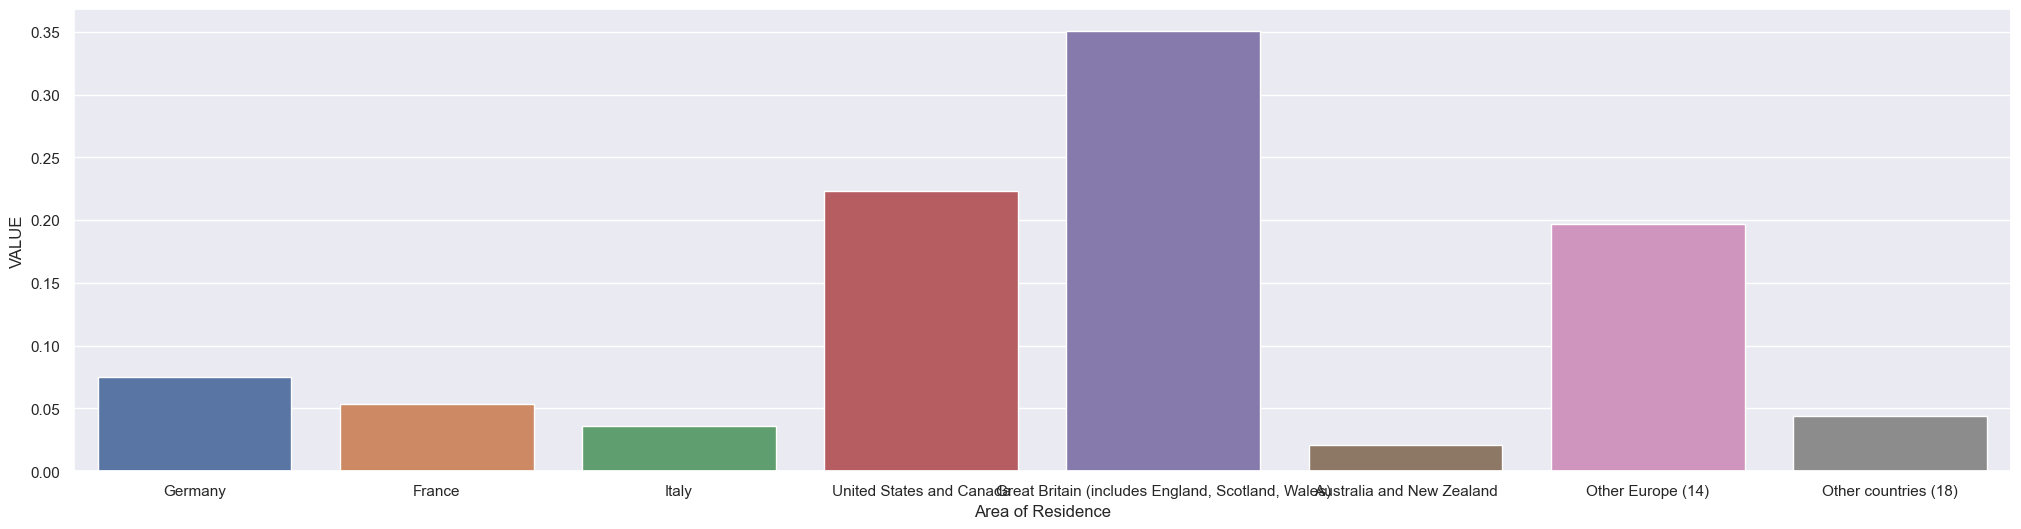

In [51]:
def tma09C1_frequencies_no_allcountries():
    df = cso_df("tma09")

    df = df[df["Statistic Label"]=="Overseas Trips to Ireland by Non-Residents"]

    # 2009 and 2010 there are missing values. 
    # Remove lines and restrict research to 2011-2019
    df = df[df["Year"]>=2011]

    for year in range(2011, 2020):
        #tot = ((df.[df["Area of Residence"]=="All Countries"])[df["Year"]==year])["VALUE"].iloc[0]
        tot_year = df.loc[(df["Area of Residence"] == "All Countries") & (df["Year"]==year)]["VALUE"].iloc[0]

        df.loc[df['Year'] == year, 'VALUE'] = df[df['Year'] == year]["VALUE"]/tot_year

    df = df.drop(df.loc[df["Area of Residence"]=="All Countries"].index)
    return df


df = tma09C1_frequencies_no_allcountries().loc[tma09C1_frequencies_no_allcountries()["Year"]==2019]


sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(25, 6))
 
sns.barplot(df, x="Area of Residence", y="VALUE", ax=ax)
plt.show()


In [16]:
# NAME CONVENTION csoStatCode_bla bla bla

def htq01():
    return cso_df("htq01")

def htq17():
    return cso_df("htq17")

def tma09():
    return cso_df("tma09")



def tma09_value():
    df = cso_df("tma09")  
    
    #df = df.loc[:,"VALUE"]
    df = df["VALUE"]
    
    return df
    


#df = tma09C1_frequencies()
#df["Statistic Label"].value_counts()
#df.head()

#df.to_excel("tma09.xlsx")

#tma09C1_frequencies()

# Exploratory Data Analysis

This part of the Jupyter Notebook will be used as a Terminal to quickly visualize tables in tabular or graphical mode. This Section has a subsection for each Dataset


## HTQ01 - Travel by Irish Residents

In [ ]:
htq01().head()

In [ ]:
htq01().shape

In [ ]:
htq01().info()

## HTQ17 - Domestic Travel By Irish Residents

In [ ]:
htq17().head()

In [ ]:
htq17().shape

In [ ]:
htq17().describe(include='all')

In [ ]:
htq17()["Reason for Journey"].value_counts()

In [ ]:
htq17()["Quarter"].value_counts()

In [ ]:
htq17()["Region Visited"].value_counts()

In [ ]:
htq17()["VALUE"].isnull().sum()

In [ ]:
htq17().hist(column='VALUE')

In [ ]:
htq17().hist(column='VALUE', bins=50)

In [ ]:
skim(htq17())

In [ ]:
summary = dfSummary(htq17())
summary

In [ ]:
# Read csv from url
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HTQ21/CSV/1.0/en"


In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
dfSummary(df)

In [ ]:
# TMA10 - Estimated Expenditure by Overseas Travellers to Ireland

In [ ]:
tma10_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TMA10/CSV/1.0/en")

In [ ]:
tma10_df.head()

In [ ]:
tma10_df.shape

In [ ]:
dfSummary(tma10_df)

In [ ]:
# TMA09 - Overseas Trips (incl. Expenditure) to Ireland

In [ ]:
tma09_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TMA09/CSV/1.0/en")

In [ ]:
tma09_df.head(33)

In [ ]:
tma09_df.shape

In [ ]:
tma09_df.describe(include="all")

In [ ]:
dfSummary(tma09_df)

In [ ]:
tma09_df["C02173V02619"].value_counts()

In [ ]:
tma09_df_C1 = tma09_df[tma09_df["STATISTIC"]=="TMA09C1"]

In [ ]:
tma09_df_C1.head(10)

In [ ]:
# Number of Overseas Trips trend

In [ ]:
sns.barplot(x=tma09_df_C1["Year"], y=tma09_df_C1["VALUE"])

In [ ]:
# matplotlib test 


plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]


type(y)


In [ ]:
x = tma09_df_C1["Year"].values
y = tma09_df_C1["VALUE"].values



In [ ]:
# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
#seaboarn

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

tips.head()


In [ ]:
# PANDAS ORDER BY
tma09_df_C1.sort_values("VALUE").sort_values("Area of Residence").sort_values("Year")

In [ ]:
# PANDAS SELECT ROWS
tma09_df_C1_2019 = tma09_df_C1[tma09_df_C1["Year"]==2019]
tma09_df_C1_2019.head(100)


# PANDAS RENAME COLUMN
tma09_df_C1_2019 = tma09_df_C1_2019.rename(columns={"C02173V02619":"Country Code"})

#tma09_df_C1_2020.to_excel("tabella.xlsx")

In [ ]:
# Visualization: seaborn distplot
sns.set_theme(style="darkgrid")

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 4))
 
# drawing the plot
sns.barplot(data=tma09_df_C1_2019.sort_values("VALUE")[tma09_df_C1_2019["Area of Residence"]!="All Countries"], y="Area of Residence", x="VALUE",  ax=ax)
plt.show()

#sns.lineplot(
#    tma09_df_C1_2020, x="C02173V02619", y="VALUE"
#)



In [ ]:
tma09_df_C1["Statistic Label"].unique()

In [ ]:

# Year and VALUE

sns.relplot(
    data=tma09_df_C1,
    x="Year", y="VALUE", hue="Area of Residence",
)

In [ ]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
tma09_df_C1.head(20)

In [ ]:
tma09_df_C1_ds = tma09_df_C1.dropna(axis=0)
tma09_df_C1_ds.head(20)

In [ ]:
tma09_df_C1_ds.isnull().values.any()

In [ ]:
tma09_df_C1_ds = tma09_df_C1_ds[tma09_df_C1_ds["Area of Residence"]!="All Countries"]

In [ ]:
# Removing columns
tma09_df_C1_ds_clean = tma09_df_C1_ds.drop(['C02173V02619', 'TLIST(A1)', 'STATISTIC', 'Statistic Label', 'UNIT'],axis=1)
# Separating dataset from labels
#tma09_df_C1_ds = tma09_df_C1.iloc[:,:7]


#tma09_df_C1_labels = tma09_df_C1_ds.iloc[:,7]
#tma09_df_C1_ds = tma09_df_C1_ds_clean
#tma09_df_C1_labels.head()


In [ ]:
tma09_df_C1_ds_clean.head()

In [ ]:
tma09_df_C1_ds_clean = tma09_df_C1_ds_clean[tma09_df_C1_ds_clean["Area of Residence"]!="All Countries"]
tma09_df_C1_ds_clean.head(100)

In [ ]:
tma09_df_C1_labels = tma09_df_C1_ds_clean.drop(["Area of Residence", "Year"], axis=1)
tma09_df_C1_labels.head()

In [ ]:
tma09_df_C1_ds_clean = tma09_df_C1_ds_clean.drop(["VALUE"], axis=1)
tma09_df_C1_ds_clean.head()

# Ordinal Encoder

In [ ]:


encoder = OrdinalEncoder()
tma09_df_C1_ds_clean["Area of Residence"] = encoder.fit_transform(tma09_df_C1_ds_clean[["Area of Residence"]])

tma09_df_C1_ds_clean.head()


In [ ]:

tma09_df_C1_train_ds,tma09_df_C1_test_ds,tma09_df_C1_train_label,tma09_df_C1_test_label = train_test_split(tma09_df_C1_ds_clean, 
                                                                tma09_df_C1_labels, test_size=0.2, random_state=42)

In [ ]:
# Linear Model


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(tma09_df_C1_train_ds, tma09_df_C1_train_label)

In [ ]:
some_data = tma09_df_C1_ds_clean.loc[:100]
some_labels = tma09_df_C1_labels.loc[:100]

In [ ]:
print(some_labels)

In [ ]:
lin_reg.predict(some_data)

In [ ]:
print(some_labels)

In [ ]:
# Measure mean_squared_error

label_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, label_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
# The model is underfitting

In [ ]:
# Decision Tree Regressor -  Better than Linear Regression


tree_reg = DecisionTreeRegressor()
tree_reg.fit(tma09_df_C1_train_ds, tma09_df_C1_train_label)
label_predictions = tree_reg.predict(some_data)

tree_mse = mean_squared_error(some_labels, label_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
print(some_labels)

In [ ]:
print(label_predictions)

In [ ]:
# K-fold  cross-validation for Decision Tree Regressor

scores = cross_val_score(tree_reg, tma09_df_C1_train_ds, tma09_df_C1_train_label, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

In [ ]:
# K-fold  cross-validation for Linear Regression

scores = cross_val_score(lin_reg, tma09_df_C1_train_ds, tma09_df_C1_train_label, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

In [ ]:
# Random Forest Regressor

forest_reg = RandomForestRegressor()
forest_reg.fit(tma09_df_C1_train_ds, tma09_df_C1_train_label)

label_predictions = lin_reg.predict(some_data)
forest_mse = mean_squared_error(some_labels, label_predictions)
forest_rmse = np.sqrt(forest_mse)
print("forest_rmse: ", forest_rmse)

scores = cross_val_score(forest_reg, tma09_df_C1_train_ds, tma09_df_C1_train_label, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)

print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std: ", scores.std())
